# Charts Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import rcParams
import matplotlib.font_manager as fm

v = (mpl.__version__)
print(f'Matplotlib Version: {v}')

Matplotlib Version: 3.6.2


In [2]:
# Set Matplotlib Theme to BMH

plt.style.use('bmh')
sns.set_context("notebook", font_scale=1.5)
sns.set_context(rc={"axes.titlesize":"x-large","axes:titlecolor":"546d78"})
sns.set_context(rc={"figure.dpi" : 300})
sns.set_context(rc={"title" : 300})
sns.set_palette("deep")


None


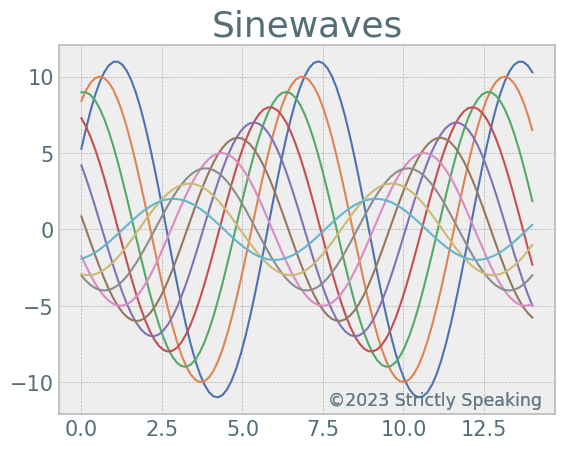

In [3]:
def sinplot(n=10, flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, n + 1):
        plt.plot(x, np.sin(x + i * .5) * (n + 2 - i) * flip)
        # Chart Title
        plt.title('Sinewaves', fontsize = "x-large", color = '#546d78' ) 
        # Axes Parameters
        plt.gca().tick_params(labelsize = 'small', labelcolor = '#546d78', left=False,
        bottom=False, grid_linewidth = 0.5)
        # Watermark
        plt.figtext(x=0.88, y=0.12, s="©2023 Strictly Speaking", color='#546d78', 
        fontsize="x-small", weight='ultralight', ha='right', va='bottom', alpha=.20,
        transform=plt.gcf().transFigure) 

print(sinplot())